<a href="https://colab.research.google.com/github/pbellot/ANFTDM2021/blob/main/Categorisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données Corpus SARS-MERS-Export.csv
## Mise en forme en .csv pour Weka

### Lecture du fichier de départ Corpus SARS-MERS-Export.csv

In [ ]:
import pandas as pd
import csv
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

fichierCSVEntree = "/Users/Patrice/PycharmProjects/ANF2021/ANF/CorpusCovid.csv"
fichierSortie = "/Users/Patrice/PycharmProjects/ANF2021/ANF/CorpusWeka.csv"

print("Ouverture fichier : ", fichierCSVEntree)
data = pd.read_csv(fichierCSVEntree, sep=";", header=0, error_bad_lines=False, encoding="utf_8", usecols=[0,1,13,14,15,16], names=["Nom","Titre","Langue","Resume","MotsCles","Categories"])
print(data.info())
print(data.head())

## Quelques statistiques générales

Nombre total de documents :   2532 (2532, 6)
Nombre de documents en français :  67
Documents en  Anglais  :  2197
Documents en  Français  :  67
Documents en  Indéterminé  :  230
Documents en  Allemand  :  38
Les mots les plus fréquents par langue dans les titres : 
pour langue  Anglais  :  [('of', 1543), ('and', 973), ('in', 852), ('the', 774), ('a', 451), ('for', 338), ('respiratory', 281), ('acute', 229), ('to', 217), ('with', 217), ('sars', 204), ('severe', 204), ('coronavirus', 202), ('virus', 198), ('syndrome', 179), ('on', 164), ('by', 162), ('from', 150), ('human', 138), ('protein', 131), ('an', 114), ('viral', 101), ('infection', 84), ('analysis', 82), ('infectious', 82)]
pour langue  Français  :  [('de', 41), ('des', 29), ('la', 29), ('et', 18), ('les', 14), ('le', 14), ('en', 11), (':', 10), ('à', 10), ('du', 9), ('virus', 9), ('un', 8), ('au', 6), ('sur', 5), ('brèves', 5), ('dans', 4), ('santé', 4), ('une', 3), ('prise', 3), ('charge', 3), ('international', 3), ('développem

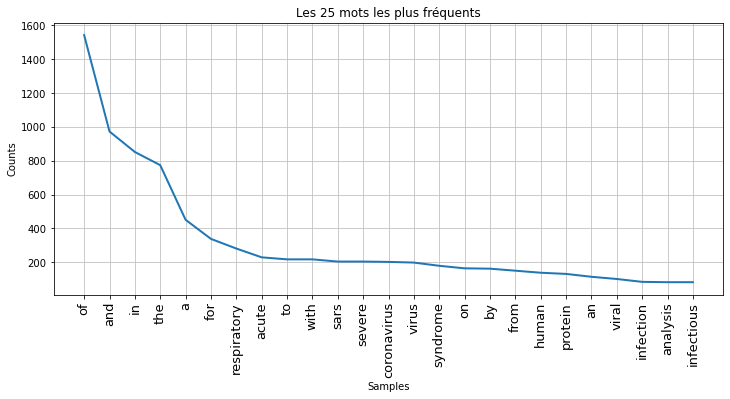

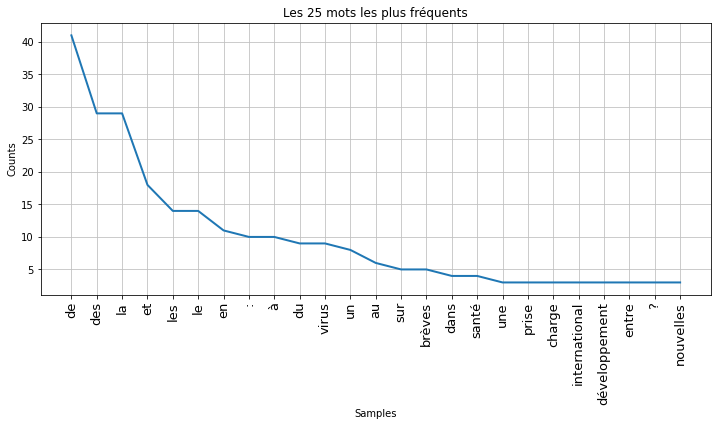

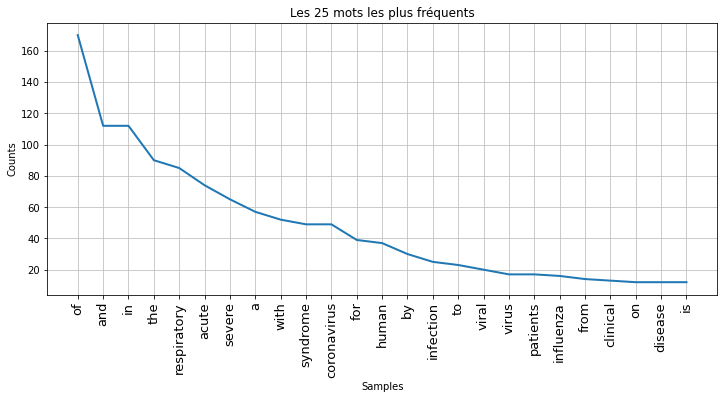

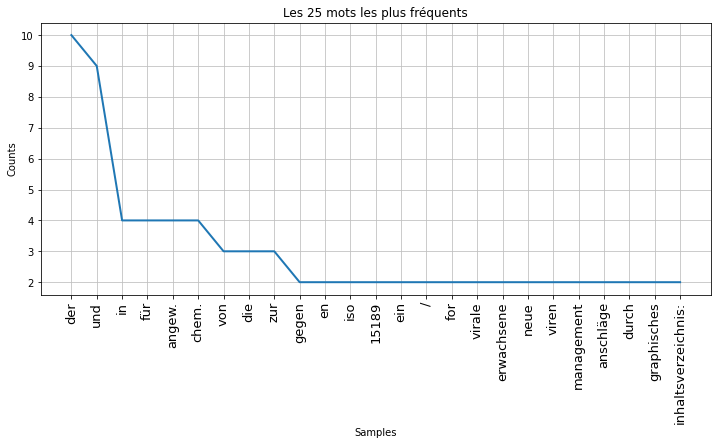

In [ ]:
#Nombre d'instances (de documents ou encore de lignes)
print('Nombre total de documents :  ',len(data), data.shape)
#Nombre de document par langue
print("Nombre de documents en français : ", len(data[data.Langue=='Français']))
for langue in data['Langue'].unique():
    print("Documents en ", langue, " : ", len(data[data.Langue==langue]))
data.groupby('Langue', dropna=False).describe()

print("Les mots les plus fréquents par langue dans les titres : ")
for langue in data['Langue'].unique():
    mots_des_titres = []
    for titre in list(data['Titre'][data.Langue==langue]):
        mots = titre.split()
        for mot in mots:
            mots_des_titres.append(mot.lower())
    print("pour langue ", langue, " : ", Counter(mots_des_titres).most_common(25))
    # plot word frequency distribution of first few words
    plt.figure(figsize=(12,5))
    plt.title('Les 25 mots les plus fréquents')
    plt.xticks(fontsize=13, rotation=90)
    fd = nltk.FreqDist(mots_des_titres)
    fd.plot(25,cumulative=False)

print("Les mots les plus fréquents par langue dans les résumés : ")
for langue in data['Langue'].unique():
    mots_des_resumes = []
    for texte in data['Resume'][data.Langue==langue]:
        if isinstance(texte,str):
            mots = texte.split()
            for mot in mots:
                mots_des_resumes.append(mot.lower())
    print("pour langue ", langue, " : ", Counter(mots_des_resumes).most_common(25))

### Suppression des mots outils
(pour le comptage seulement : ils seront conservés dans le fichier de sortie)

Les mots les plus fréquents par langue dans les résumés après suppression des mots outils : 
pour langue  Anglais  :  [('virus', 947), ('respiratory', 919), ('protein', 855), ('viral', 821), ('sars', 794), ('human', 687), ('patients', 650), ('using', 583), ('acute', 568), ('also', 567), ('severe', 512), ('infection', 508), ('used', 507), ('may', 501), ('disease', 497), ('cells', 486), ('new', 458), ('viruses', 457), ('study', 454), ('cell', 454), ('two', 449), ('syndrome', 427), ('results', 406), ('proteins', 392), ('rna', 388)]
pour langue  Français  :  [('a', 29), ('virus', 20), ('cette', 17), ('plus', 15), ('chez', 13), ('d’une', 13), ('système', 9), ('comme', 9), ('développement', 8), ('voie', 8), ('sras', 8), ('d’un', 7), ('fait', 7), ('ainsi', 7), ('arn', 7), ('mécanismes', 7), ('nouvelles', 7), ('vaccins', 7), ('coiffe', 7), ('agents', 6), ("l'eca", 6), ('plusieurs', 6), ('bien', 6), ('encore', 6), ('nombreux', 6)]
pour langue  Indéterminé  :  [('the', 1521), ('of', 1335), ('and

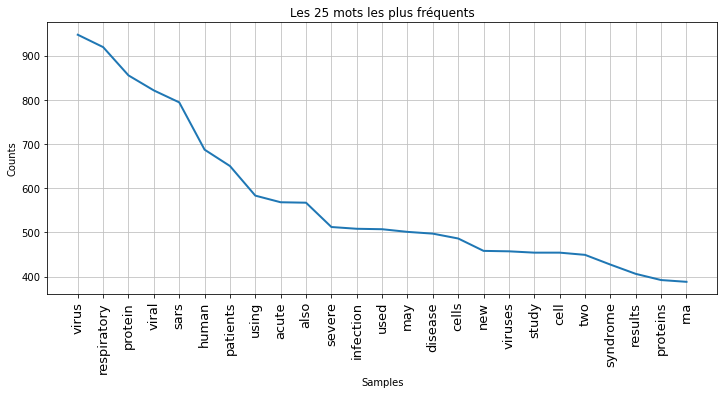

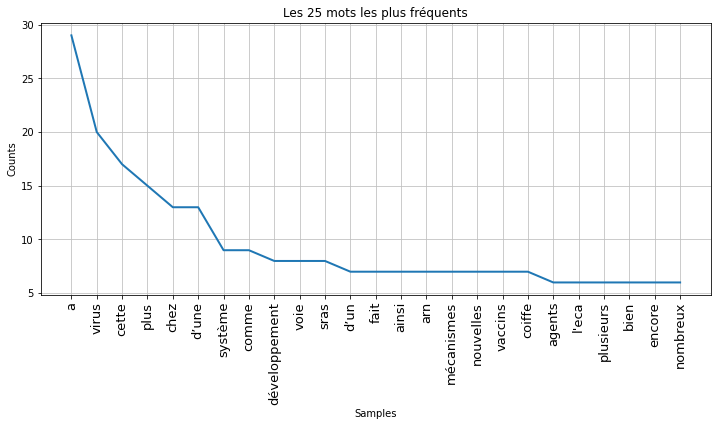

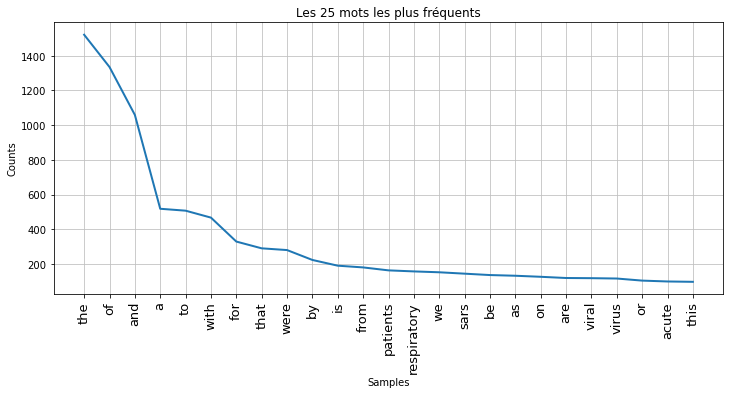

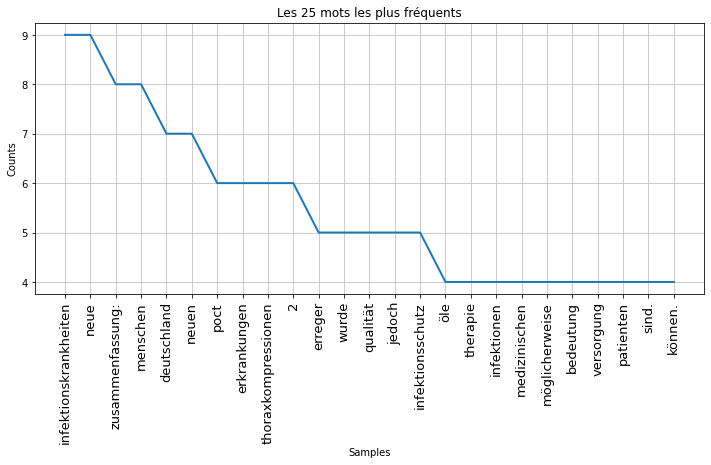

In [ ]:
print("Les mots les plus fréquents par langue dans les résumés après suppression des mots outils : ")
for langue in data['Langue'].unique():
    mots_des_resumes = []
    stop_words = []
    if langue.lower() == "anglais":
        stop_words = stopwords.words('english')
    elif langue.lower() == "français":
        stop_words = stopwords.words('french')
    else:
        stop_words = stopwords.words('german')
    for texte in data['Resume'][data.Langue==langue]:
        if isinstance(texte,str):
            mots = texte.split()
            for mot in mots:
                if mot.lower() not in stop_words:
                    mots_des_resumes.append(mot.lower())
    print("pour langue ", langue, " : ", Counter(mots_des_resumes).most_common(25))
    # plot word frequency distribution of first few words
    plt.figure(figsize=(12,5))
    plt.title('Les 25 mots les plus fréquents')
    plt.xticks(fontsize=13, rotation=90)
    fd = nltk.FreqDist(mots_des_resumes)
    fd.plot(25,cumulative=False)



## Enregistrement du .csv complet

In [ ]:
#enregistrement du csv final pour Weka
data.to_csv(fichierSortie,sep=',',na_rep='?', index = False, header=True, quoting=csv.QUOTE_NONNUMERIC, quotechar='"', doublequote=False, escapechar='\\')

## Enregistrement des colonnes Résumés et Catégories seules
### Traitement de la colonne catégories en ne gardant qu'une seule catégorie par document
(la 1ère catégorie du niveau 2 si elle existe, la catégorie de niveau 1 sinon)
NB : les lignes dont la catégorie ou bien le résumé sont absents sont supprimées

In [ ]:
resumesClasses = data[['Resume','Categories']][data['Resume'].notnull()]
resumesClasses = resumesClasses[resumesClasses['Categories'].notnull()]

import re
for index, row in resumesClasses.iterrows():
    cat = str(row['Categories'])
    #print(cat)
    catRetenue = re.search(" 2 - ([a-z]+)", cat)
    if catRetenue:
        #print(catRetenue[1])
        row['Categories'] = catRetenue[1]
    else:
        #print(cat)
        catRetenue = re.search("1 - ([a-z]+)", cat)
        if catRetenue:
            #print(catRetenue[1])
            row['Categories'] = catRetenue[1]

print(resumesClasses.head())
print("Nombre de documents présents : ", len(resumesClasses))

fichierSortie = "/Users/Patrice/PycharmProjects/ANF2021/ANF/CorpusWekaResumes.csv"
resumesClasses.to_csv(fichierSortie,sep=',',na_rep='?', index = False, header=True, quoting=csv.QUOTE_NONNUMERIC, quotechar='"', doublequote=False, escapechar='\\')

                                               Resume         Categories
0   Structural biology is making significant contr...               cell
2   The threat of infection by conventional transf...         hematology
4   Not science fiction, but a technically feasibl...  multidisciplinary
6   Severe acute respiratory syndrome coronavirus ...          chemistry
11  Objective: To understand the association betwe...             public
Nombre de documents présents :  1276
